In [7]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils


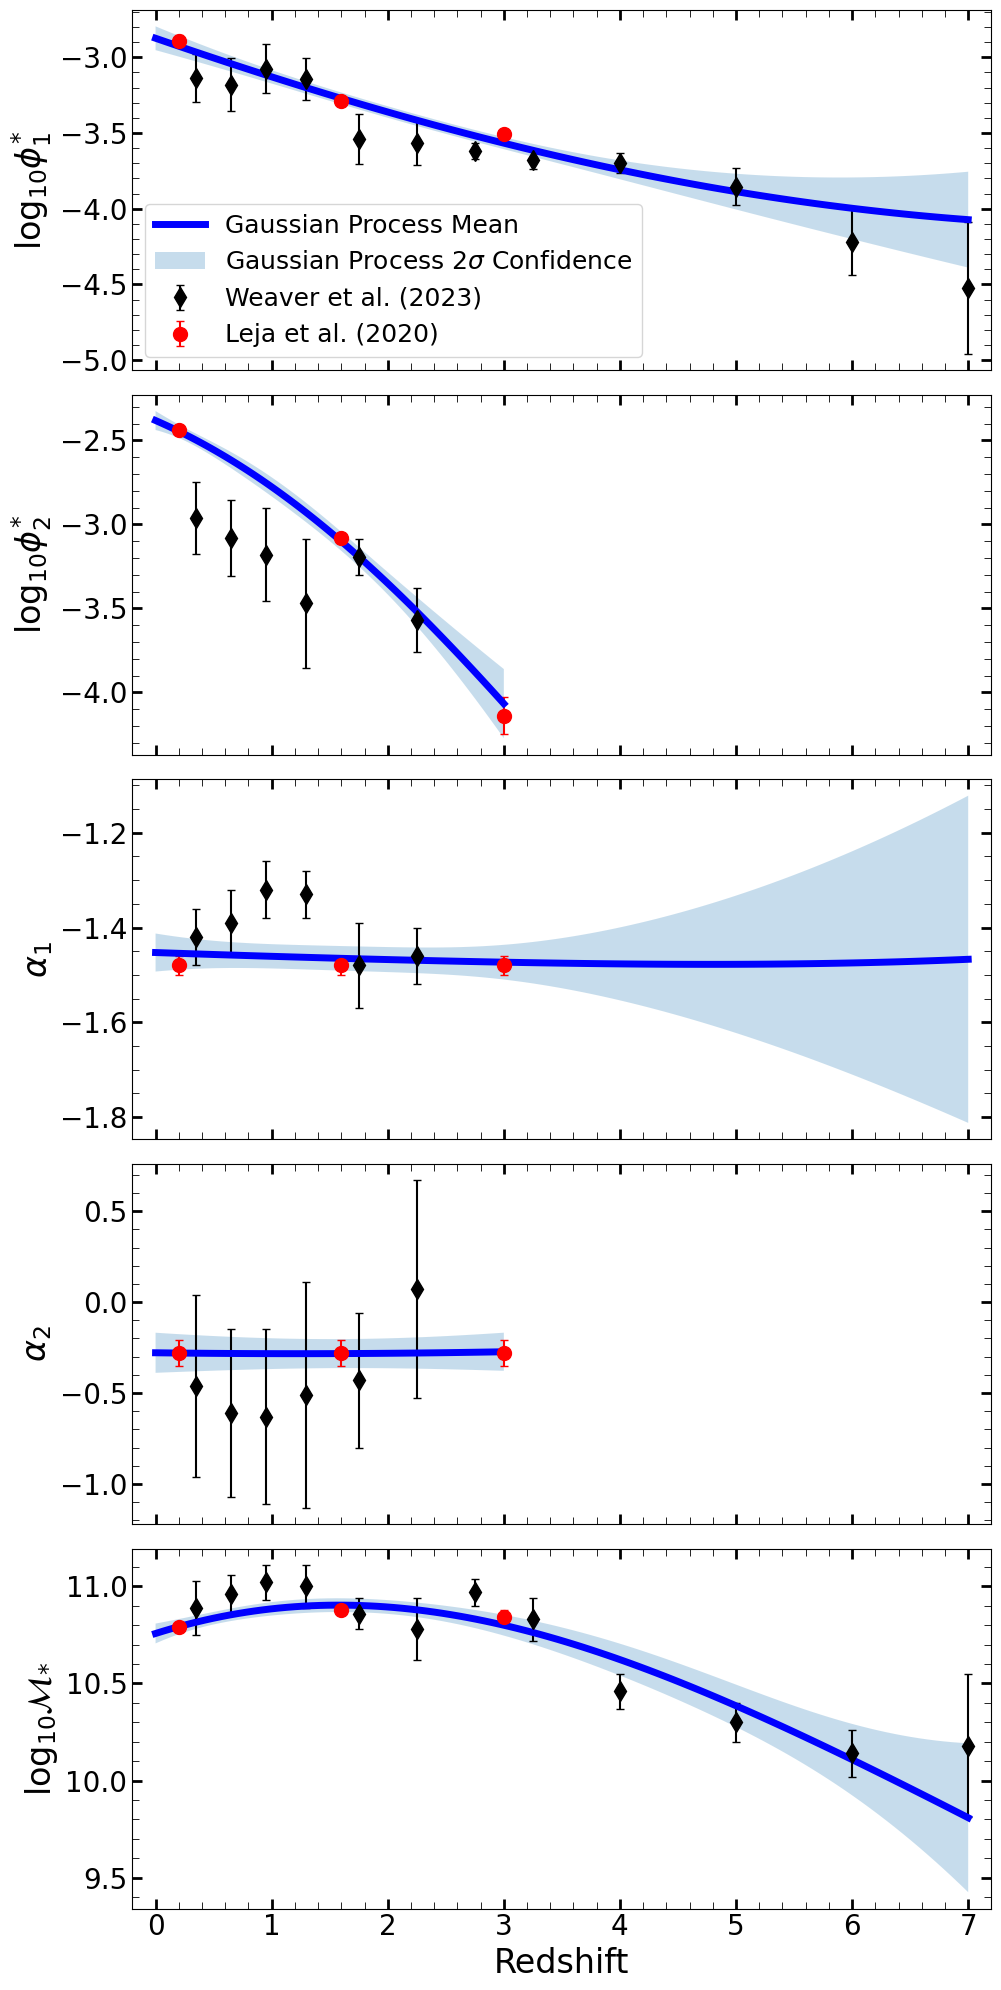

In [8]:
mass_function_prior = gpmf.MassFunctionPrior('.', mean=False)

mass_function_prior.plot_confidence()

In [9]:
nden_reals = []
for i in range(0, 1000):
    sparams = mass_function_prior.sample_prior()
    n_tot = mass_function_prior.total_number(sparams)
    nden = n_tot/(utils.LSST_AREA_ARCMIN2)
    nden_reals.append(nden)

nmean = np.mean(nden_reals)
nstd = np.std(nden_reals)

print("Total Number Density: ",nmean,"+/-",nstd)

Total Number Density:  1898.2482702349796 +/- 207.85702823012875


In [4]:
n_prior_samples = 500
nsamples=100000
zbins = np.arange(0.0, 7.0, 0.1)
mbins = np.arange(7, 13, 0.1)

zarr=[]
marr=[]
zs=[]
logms=[]
for i in range(n_prior_samples):
    zsamples, msamples = mass_function_prior.sample_log_n(nsamples)
    z_histogram = np.histogram(zsamples, bins=zbins, density=True)
    m_histogram = np.histogram(msamples, bins=mbins, density=True)

    zs.append(zsamples)
    logms.append(msamples)

    zarr.append(z_histogram[0])
    marr.append(m_histogram[0])



/Users/fpetri/repos/LBGforecast/lbg_forecast/priors_gp_massfunc.py:171: RuntimeWarning: divide by zero encountered in log
  return np.log(ngalaxies)


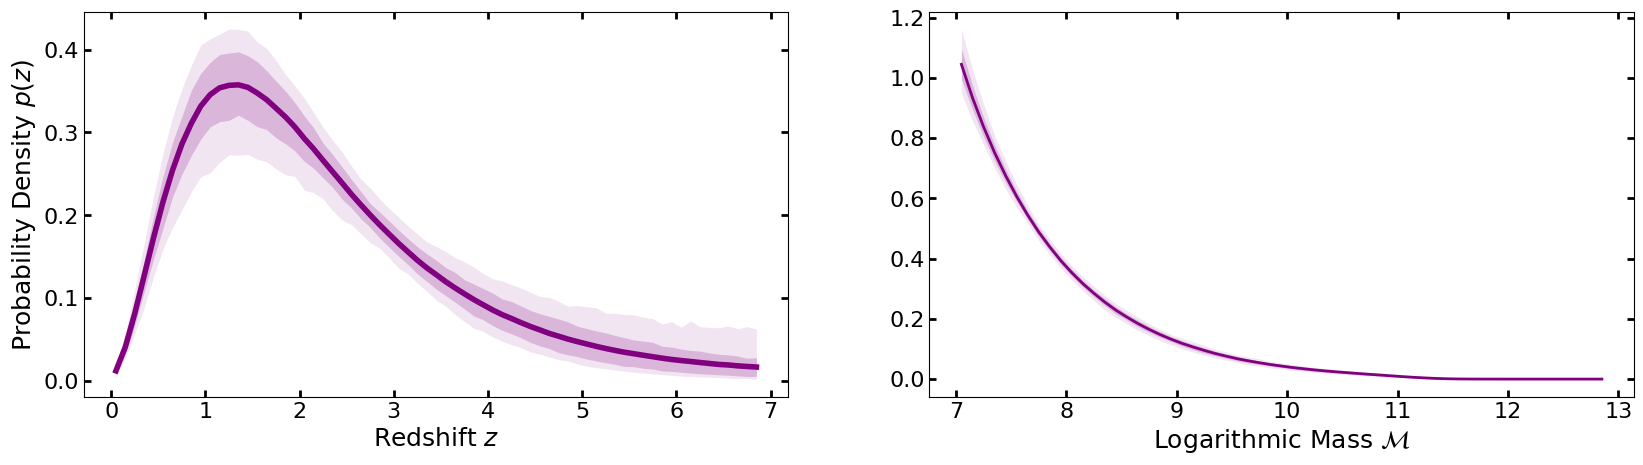

In [82]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

zs = np.vstack(np.array(zarr))
ms = np.vstack(np.array(marr))

p1=85
percentile_zs1 = np.percentile(zs, [100-p1, 50, p1], axis=0)
percentile_ms1 = np.percentile(ms, [100-p1, 50, p1], axis=0)

p2=98
percentile_zs2 = np.percentile(zs, [100-p2, 50, p2], axis=0)
percentile_ms2 = np.percentile(ms, [100-p2, 50, p2], axis=0)

alpha=0.2
colour='purple'

zs_mean = np.mean(zs, axis=0)
ax[0].plot((zbins[:-1]+zbins[1:])/2, zs_mean, lw=4, ms=3, color=colour)
ax[0].fill_between((zbins[:-1]+zbins[1:])/2, percentile_zs1[0, :],  percentile_zs1[2, :], alpha=alpha, color=colour, lw=0)
ax[0].fill_between((zbins[:-1]+zbins[1:])/2, percentile_zs2[0, :],  percentile_zs2[2, :], alpha=alpha/2, color=colour, lw=0)
ax[0].set_xlabel('Redshift $z$', fontsize=18)
ax[0].set_ylabel('Probability Density $p(z)$', fontsize=18)
ax[0].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[0].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
#for curve in zarr:
    #ax[0].plot((zbins[:-1]+zbins[1:])/2, curve, alpha=0.1, c='purple')

ms_mean = np.mean(ms, axis=0)
ax[1].plot((mbins[:-1]+mbins[1:])/2, ms_mean, lw=2, color=colour)
ax[1].fill_between((mbins[:-1]+mbins[1:])/2, percentile_ms1[0, :],  percentile_ms1[2, :], alpha=alpha, color=colour, lw=0)
ax[1].fill_between((mbins[:-1]+mbins[1:])/2, percentile_ms2[0, :],  percentile_ms2[2, :], alpha=alpha/2, color=colour, lw=0)
ax[1].set_xlabel('Logarithmic Mass $\mathcal{M}$', fontsize=18)
ax[1].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[1].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
#for curve in marr:
    #ax[1].plot((mbins[:-1]+mbins[1:])/2, curve, alpha=0.1, c='purple')

In [ ]:
cmap = plt.get_cmap('viridis')
print(cmap)

redshift = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
masses = np.linspace(8, 12, 15)
nsamples = 1000
for z in redshift:
    mfunc_at_z = []
    for n in range(nsamples):
        mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior())
        mfunc_at_z.append(mfunc)

    mfunc_at_z = np.vstack(np.array(mfunc_at_z))
    mfunc_at_z_mean = np.mean(mfunc_at_z, axis=0)
    mfunc_at_z_std = np.std(mfunc_at_z, axis=0)
    #mfunc_at_z_quantile = np.quantile(mfunc_at_z, 0.85, axis=0)
    plt.errorbar(masses, mfunc_at_z_mean, yerr=mfunc_at_z_std, color=cmap(z/7), marker="o", ls=' ', ms=4, label="z="+str(z), capsize=3)
    plt.fill_between(masses, mfunc_at_z_mean-mfunc_at_z_std,  mfunc_at_z_mean+mfunc_at_z_std, color=cmap(z/7), alpha=0.2)
            
plt.ylim(1e-8, 1e-1)
plt.ylabel("Mass Function $\Phi(\mathcal{M}, z) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=16)
plt.xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=16)
#plt.tick_params('x', labelsize=18, width=2, size=5)
#plt.tick_params('y', labelsize=18, width=2, size=5)
plt.yscale('log')
plt.legend(loc="best")